### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd

In [18]:
column_names = ['TIK','YIK','number_voters','received_ballots','indoor_ballots','outdoor_ballots','unused_ballots'
                 ,'portable_boxes','stationary_boxes','invalid_ballots','valid_ballots','lost_ballots',
                 'unaccounted_ballots','Amosov','Beglov','Tihonova']

In [19]:
df = pd.read_csv('data.csv',index_col=None, header=None)
df.columns = column_names
df.head(10)

,TIK,YIK,number_voters,received_ballots,indoor_ballots,outdoor_ballots,unused_ballots,portable_boxes,stationary_boxes,invalid_ballots,valid_ballots,lost_ballots,unaccounted_ballots,Amosov,Beglov,Tihonova
0,1,1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,1,2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,1,3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,1,4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,1,5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82
5,1,6,1557,1200,453,13,734,13,453,12,454,0,0,118,263,73
6,1,7,2095,1600,532,17,1051,17,532,13,536,0,0,131,305,100
7,1,8,1523,1100,590,13,497,13,590,19,584,0,0,127,364,93
8,1,9,1463,1300,473,26,801,26,473,17,482,0,0,128,253,101
9,1,10,1629,1200,486,7,707,7,486,14,479,0,0,118,267,94


1)Явка (%) по всем ТИК, отсортированая по убыванию

In [20]:
df1 = df.groupby('TIK').sum()
((df1['indoor_ballots']+df1['outdoor_ballots'])/df1['number_voters']).sort_values(ascending=False) * 100

TIK
18    51.531228
15    40.013072
13    39.672610
19    37.812382
8     36.040981
20    33.780554
9     33.521975
22    32.486297
30    32.102011
2     31.787913
1     31.483272
29    30.770507
10    30.517413
4     30.431840
7     29.254120
21    29.138204
25    29.020921
17    28.440004
23    28.193842
16    28.191436
14    27.522452
28    27.224589
11    26.877083
5     26.753819
24    26.653968
3     26.620459
12    26.410227
26    26.264800
6     25.008379
27    24.792315
dtype: float64

2)выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек)-выбрал Беглова

In [22]:
df2 = df[df['portable_boxes']+df['stationary_boxes']>100]
df.loc[(df2['Beglov']/df2['valid_ballots'] * 100).idxmax(),'YIK']

403

3)найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [23]:
df['turnout'] = (df['indoor_ballots'] + df['outdoor_ballots'])/df['number_voters']
ans = df.groupby('TIK')['turnout'].max() - df.groupby('TIK')['turnout'].min()
ans.idxmax()

17

4)посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)

In [24]:
df.groupby('TIK')['turnout'].var()

TIK
1     0.019318
2     0.046018
3     0.007414
4     0.022281
5     0.013662
6     0.002066
7     0.007111
8     0.025984
9     0.011893
10    0.007409
11    0.023945
12    0.003322
13    0.039350
14    0.003073
15    0.041609
16    0.011347
17    0.032932
18    0.023069
19    0.020470
20    0.017357
21    0.031019
22    0.045004
23    0.058670
24    0.027113
25    0.000918
26    0.021985
27    0.020633
28    0.039207
29    0.024439
30    0.052078
Name: turnout, dtype: float64

5)для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [49]:
ser1 = (df['Amosov']*100/df['valid_ballots']).round().value_counts().sort_index()
ser2 = (df['Beglov']*100/df['valid_ballots']).round().value_counts().sort_index()
ser3 = (df['Tihonova']*100/df['valid_ballots']).round().value_counts().sort_index()
df5 = pd.concat([ser1,ser2,ser3],axis = 1) 
df5.columns = ['Amosov','Beglov','Tihonova']
df5

,Amosov,Beglov,Tihonova
0.0,1.0,NaN,2.0
1.0,6.0,NaN,4.0
2.0,6.0,NaN,5.0
3.0,2.0,NaN,9.0
4.0,13.0,NaN,9.0
5.0,15.0,NaN,16.0
6.0,25.0,NaN,21.0
7.0,32.0,NaN,20.0
8.0,41.0,NaN,29.0
9.0,62.0,NaN,43.0


6)визуализируйте отношение - явка на УИК  →  результат кандидата.

Text(0.5, 0, 'Amosov%')

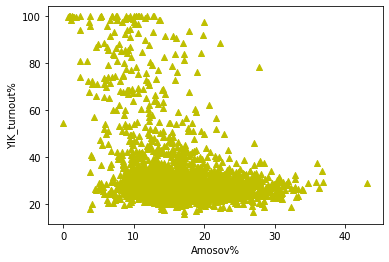

In [76]:
import matplotlib.pyplot as plt 
%matplotlib inline
df['Amosov%'] = df['Amosov']*100/df['valid_ballots']
df['Beglov%'] = df['Beglov']*100/df['valid_ballots']
df['Tihonova%'] = df['Tihonova']*100/df['valid_ballots']
df['YIK_turnout%'] = (df['indoor_ballots']+df['outdoor_ballots'])/df['number_voters'] * 100
#df[['Amosov%','YIK_turnout%']].plot(x='Amosov%',y='YIK_turnout%',title='Amosov')
plt.scatter(df['Amosov%'], df['YIK_turnout%'], marker='^', color='y')
plt.ylabel('YIK_turnout%')
plt.xlabel('Amosov%')
plt.title('Amosov')

Text(0.5, 1.0, 'Beglov')

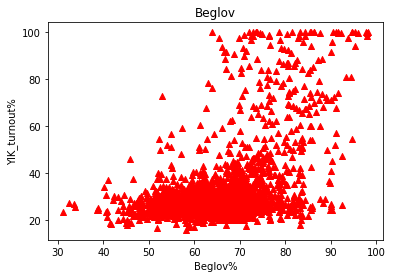

In [77]:
plt.scatter(df['Beglov%'], df['YIK_turnout%'], marker='^', color='r')
plt.ylabel('YIK_turnout%')
plt.xlabel('Beglov%')
plt.title('Beglov')

Text(0.5, 1.0, 'Tihonova')

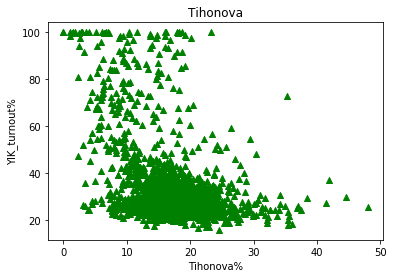

In [78]:
plt.scatter(df['Tihonova%'], df['YIK_turnout%'], marker='^', color='g')
plt.ylabel('YIK_turnout%')
plt.xlabel('Tihonova%')
plt.title('Tihonova')